This is a relatively short one because I just wanted to point people to an older (thus buried) dataset from some former colleagues that I've found really useful in the past but that I think a lot of folks aren't aware of.
The dataset is in the supplementary material to this paper: https://pubs.acs.org/doi/abs/10.1021/jm020472j
"Informative Library Design as an Efficient Strategy to Identify and Optimize Leads:  Application to Cyclin-Dependent Kinase 2 Antagonists" by Erin Bradley *et al*. The paper itself is worth reading, but the buried treasure is the Excel file in the supplementary material, which contains SMILES and measured data for >17K compounds. There's also a very useful PDF which explains the columns in that file.

What's very cool is that the compounds are a mix of things from a small general-purpose screening library and compounds purchased or synthesized for a med chem project. I'm not aware of any other public

Let's look at what's there.

In [1]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
import pandas as pd
import rdkit
print(rdkit.__version__)

/other_linux/home/glandrum/anaconda3/envs/rdkit_blog/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/other_linux/home/glandrum/anaconda3/envs/rdkit_blog/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


2020.03.1dev1


Start by reading in the file and adding a molecule column:

In [5]:
df = pd.read_excel('../data/jm020472j_s2.xls')
df.head()

,Smiles,mol_name,cdk2_ic50,cdk2_inhib,scaffold,sourcepool,cdk_act_bin_1
0,C#CC(/C=C/C)OC(=O)c(ccc1)c(c1)C(=O)O,mol_1,None,23.3,Scaffold_00,divscreen,0
1,C#CC(C)(C)N(CC1C)CC\C1=N\OC(=O)c2cc([N+]([O-])...,mol_2,None,20.5,Scaffold_00,divscreen,0
2,C#CC(C)(C)N(CN1)CNC1=S,mol_3,None,20.7,Scaffold_00,divscreen,0
3,C#CC(C)(C)N(CN1)C\N=C/1SC,mol_4,None,1.9,Scaffold_00,divscreen,0
4,C#CC(C)(C)NC(=O)CN(c(c1)cccc1)[S](=O)(=O)c2ccc...,mol_5,None,19.8,Scaffold_00,divscreen,0


,mol_name,cdk2_ic50,cdk2_inhib,scaffold,sourcepool,cdk_act_bin_1,ROMol
0,mol_1,None,23.3,Scaffold_00,divscreen,0,
1,mol_2,None,20.5,Scaffold_00,divscreen,0,
2,mol_3,None,20.7,Scaffold_00,divscreen,0,
3,mol_4,None,1.9,Scaffold_00,divscreen,0,
4,mol_5,None,19.8,Scaffold_00,divscreen,0,

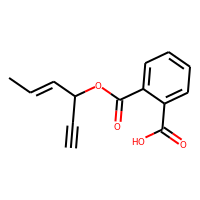
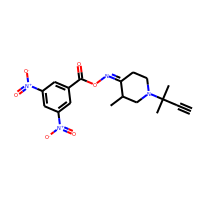
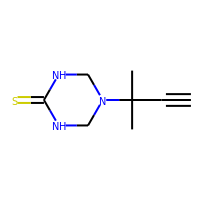
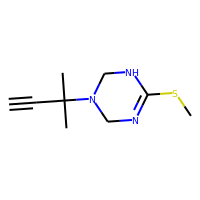
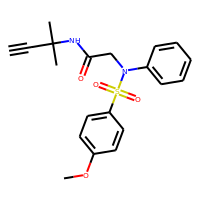

In [38]:
PandasTools.AddMoleculeColumnToFrame(df)
df = df.drop('Smiles',axis=1)
df.head()

The "sourcepool" column relates to which kind of compound it is:

- `divscreen` is from the screening library
- `simscreen` are vendor compounds picked by chemists using similarity screening
- `synscreen` are compounds made and screened during the course of the project

In [114]:
df.groupby('sourcepool')['mol_name'].count()

sourcepool
divscreen    13359
simscreen      951
synscreen     3240
Name: mol_name, dtype: int64

Another interesting column is the `scaffold`, which contains human-assigned scaffolds for the compounds

In [115]:
df[df.sourcepool=='divscreen'].groupby('scaffold')['mol_name'].count()

scaffold
Scaffold_00    12280
Scaffold_01       32
Scaffold_02      111
Scaffold_03       57
Scaffold_04      461
Scaffold_05       37
Scaffold_06       16
Scaffold_07       15
Scaffold_08      103
Scaffold_09       88
Scaffold_11        7
Scaffold_12      109
Scaffold_18        2
Scaffold_20       41
Name: mol_name, dtype: int64

In [116]:
df[df.sourcepool=='simscreen'].groupby('scaffold')['mol_name'].count()

scaffold
Scaffold_00    460
Scaffold_01     90
Scaffold_03      2
Scaffold_04     91
Scaffold_05     18
Scaffold_08    216
Scaffold_10     37
Scaffold_11      8
Scaffold_12     29
Name: mol_name, dtype: int64

In [117]:
synscreen = df[df.sourcepool=='synscreen']
synscreen.groupby('scaffold')['mol_name'].count()

scaffold
Scaffold_01    204
Scaffold_02    106
Scaffold_04     78
Scaffold_05    265
Scaffold_06    273
Scaffold_07     76
Scaffold_08     13
Scaffold_09    344
Scaffold_10    502
Scaffold_12     61
Scaffold_13     17
Scaffold_14     12
Scaffold_15     11
Scaffold_16    269
Scaffold_17    157
Scaffold_18     38
Scaffold_19    256
Scaffold_21    558
Name: mol_name, dtype: int64

Let's look at some compounds:

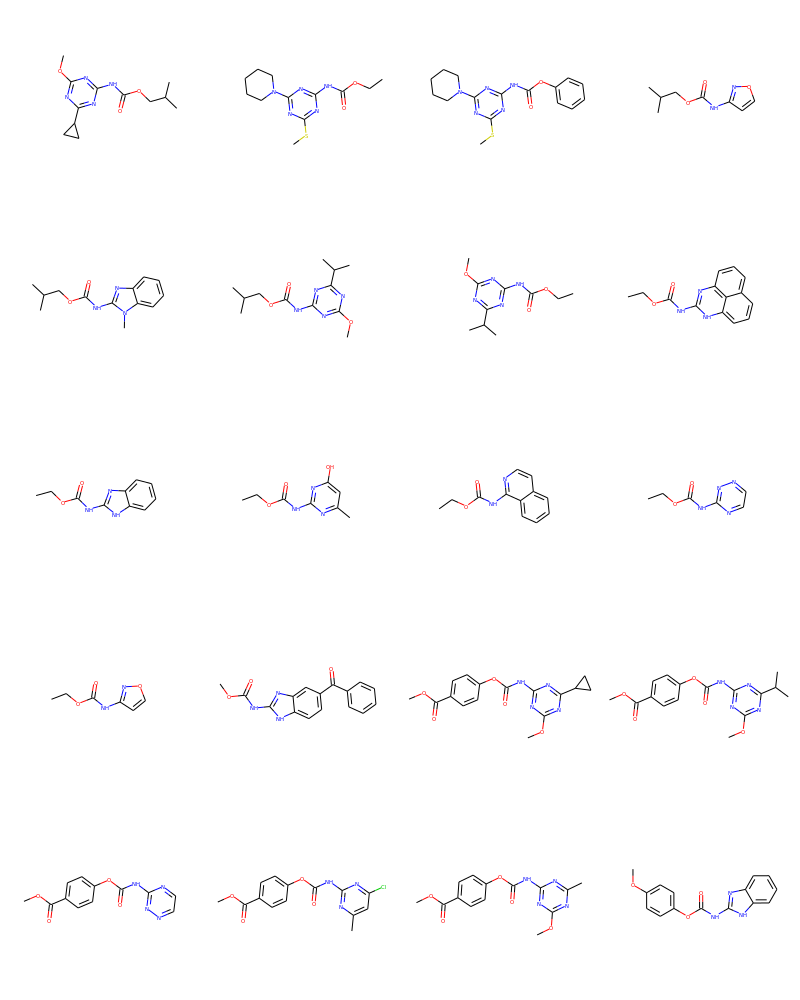

In [52]:
IPythonConsole.drawOptions.bondLineWidth=1
PandasTools.FrameToGridImage(synscreen[synscreen.scaffold=='Scaffold_18'],molsPerRow=4,maxMols=20)

We don't have the actual scaffold definitions, but we can use the standard MCS trick to guess:

[#6]-&!@[#8]-&!@[#6](=&!@[#8])-&!@[#7]-&!@[#6]


,mol_name,cdk2_ic50,cdk2_inhib,scaffold,sourcepool,cdk_act_bin_1,ROMol
946,mol_947,None,11.1111,Scaffold_18,synscreen,0,
1528,mol_1529,None,12.9218,Scaffold_18,synscreen,0,
1529,mol_1530,None,6.47714,Scaffold_18,synscreen,0,
4923,mol_4924,None,0,Scaffold_18,synscreen,0,
4924,mol_4925,None,0.905505,Scaffold_18,synscreen,0,
4927,mol_4928,None,23.1168,Scaffold_18,synscreen,0,
5464,mol_5465,None,9.49246,Scaffold_18,synscreen,0,
6775,mol_6776,None,0,Scaffold_18,synscreen,0,
6779,mol_6780,None,5.73388,Scaffold_18,synscreen,0,
6783,mol_6784,None,0,Scaffold_18,synscreen,0,

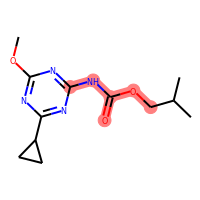
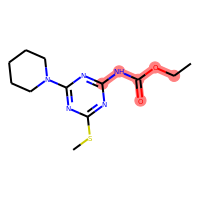
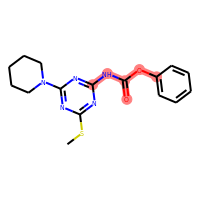
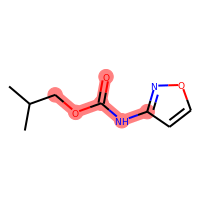
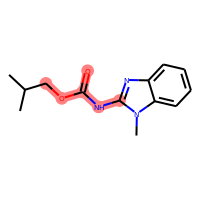
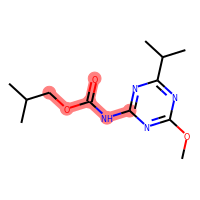
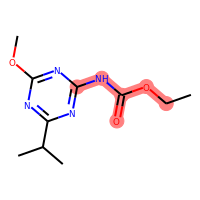
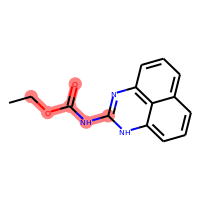
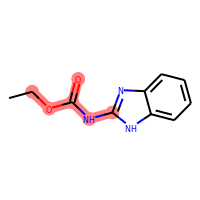
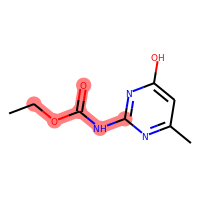
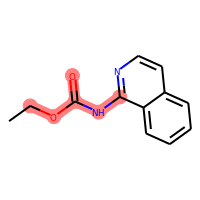
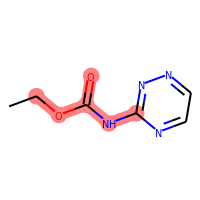
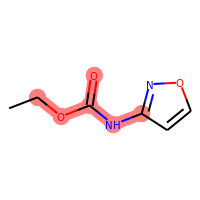
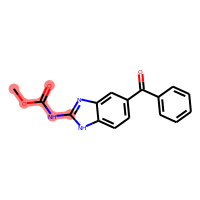
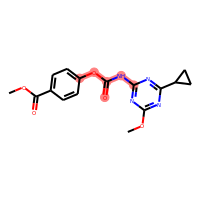
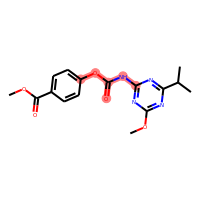
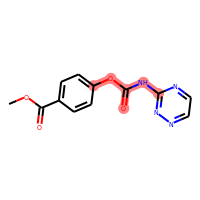
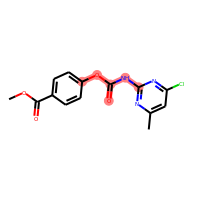
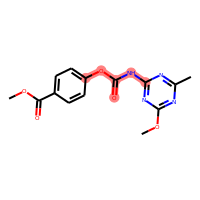
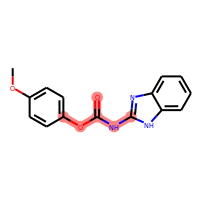
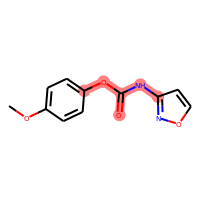
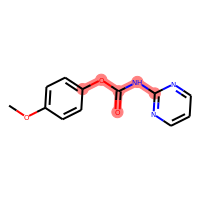
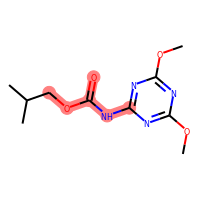
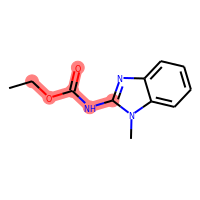
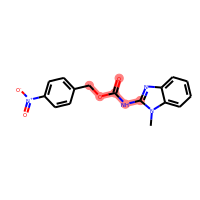
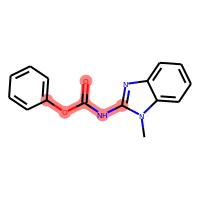
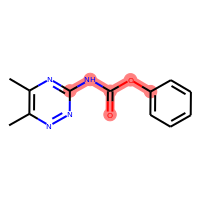
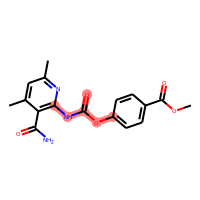
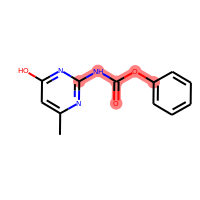
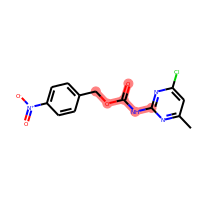
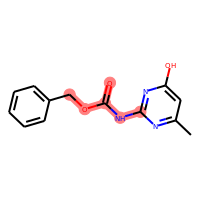
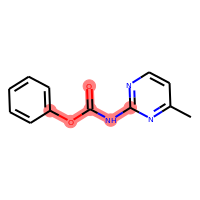
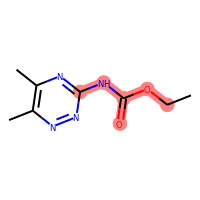
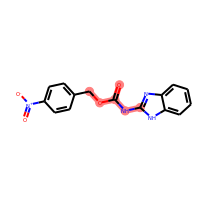
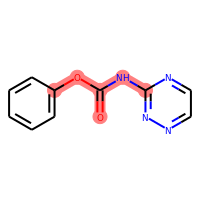
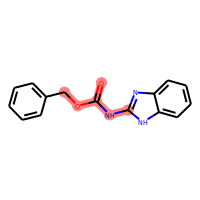
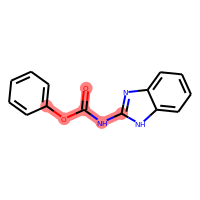
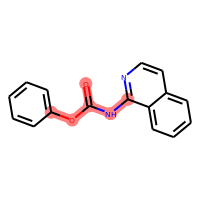

In [51]:
scaff = 'Scaffold_18'
params = rdFMCS.MCSParameters()
params.BondCompareParameters.CompleteRingsOnly=True
params.Threshold=0.8
mcs = rdFMCS.FindMCS(list(synscreen[synscreen.scaffold==scaff].ROMol),params)
print(mcs.smartsString)
tmp = synscreen[synscreen.scaffold==scaff]
tmp[tmp.ROMol>=Chem.MolFromSmarts(mcs.smartsString)]

[#6]-&!@[#7]1:&@[#6](=&!@[#8]):&@[#6]:&@[#6]:&@[#7]:&@[#6]:&@1=&!@[#8]


,mol_name,cdk2_ic50,cdk2_inhib,scaffold,sourcepool,cdk_act_bin_1,ROMol
1202,mol_1203,None,19.7348,Scaffold_12,synscreen,0,
3236,mol_3237,None,32.6813,Scaffold_12,synscreen,50,
3318,mol_3319,None,18.6061,Scaffold_12,synscreen,0,
3769,mol_3770,None,16.5904,Scaffold_12,synscreen,0,
3787,mol_3788,None,5.70459,Scaffold_12,synscreen,0,
4215,mol_4216,None,10.2919,Scaffold_12,synscreen,0,
4440,mol_4441,None,22.2017,Scaffold_12,synscreen,0,
5303,mol_5304,None,7.12303,Scaffold_12,synscreen,0,
5304,mol_5305,None,6.22931,Scaffold_12,synscreen,0,
5417,mol_5418,None,12.3034,Scaffold_12,synscreen,0,

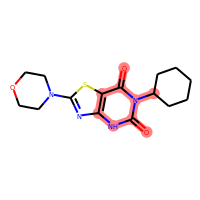
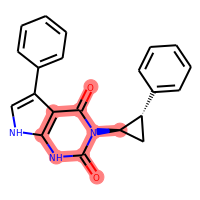
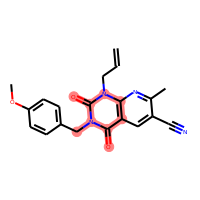
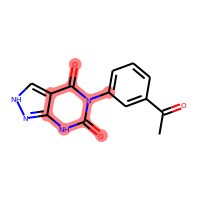
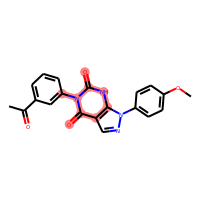
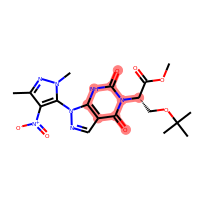
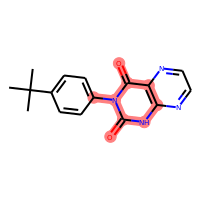
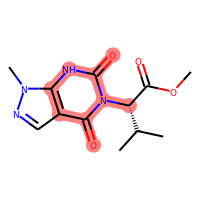
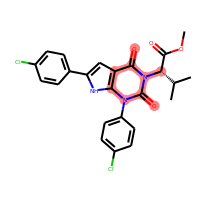
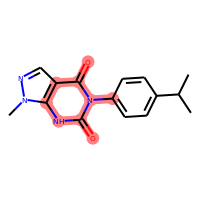
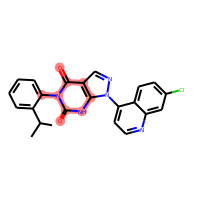
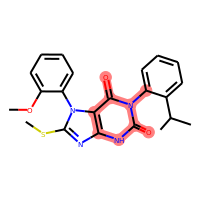
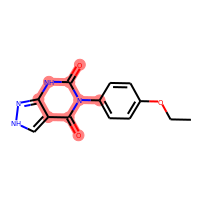
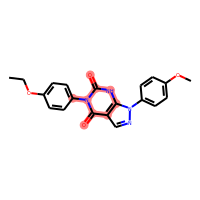
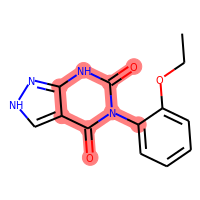
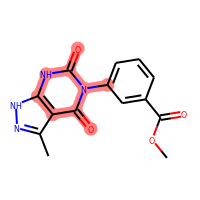
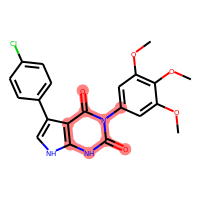
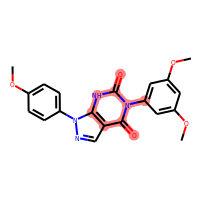
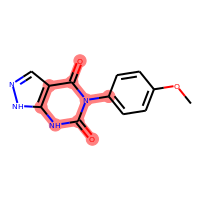
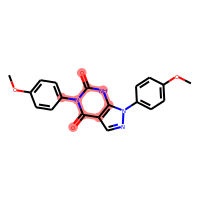
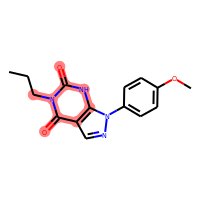
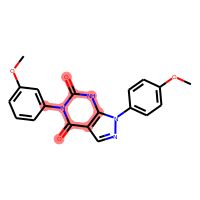
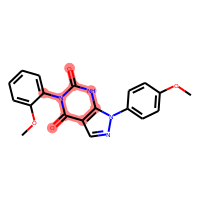
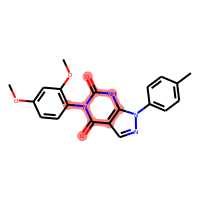
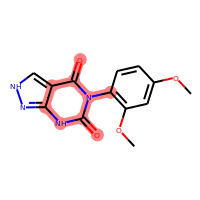
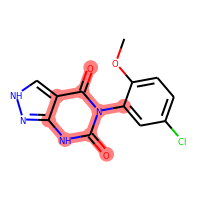
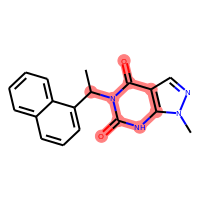
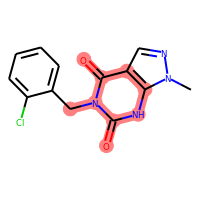
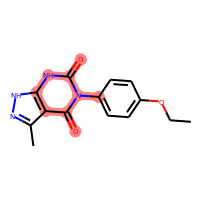
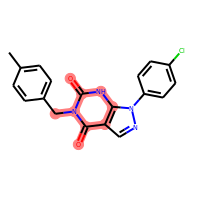
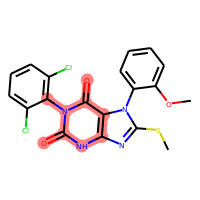
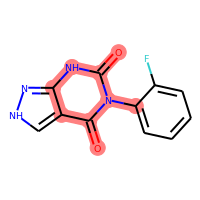
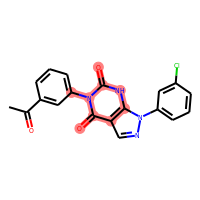
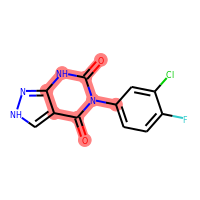
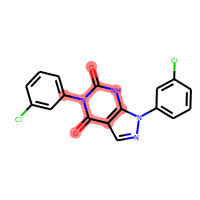
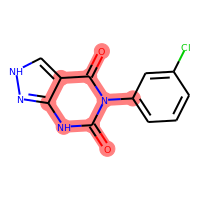
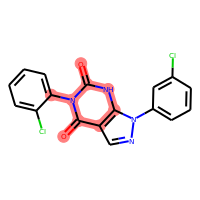
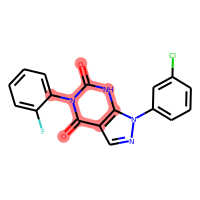
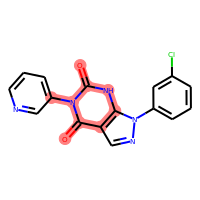
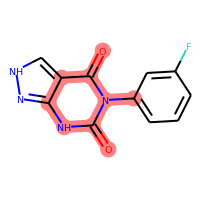
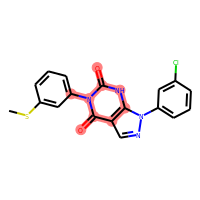
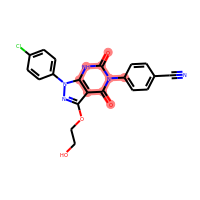
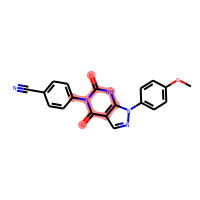
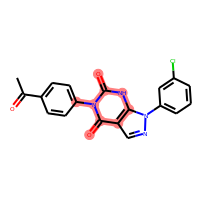
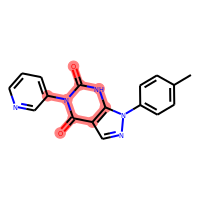
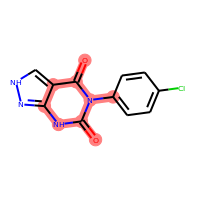
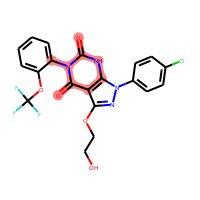
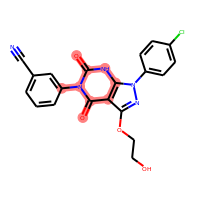
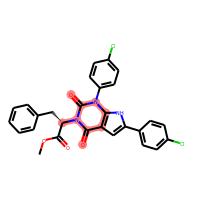
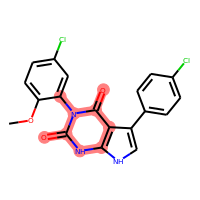
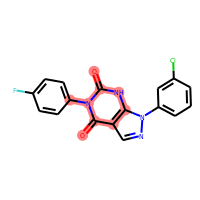
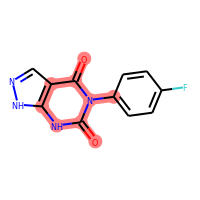
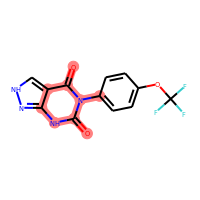
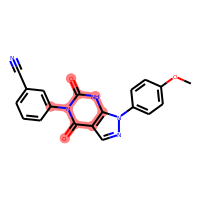
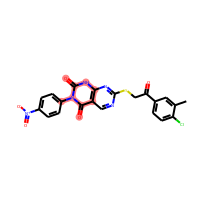
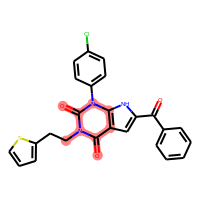
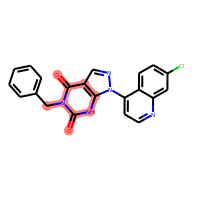
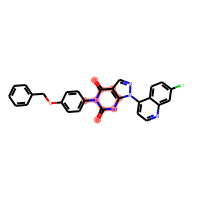
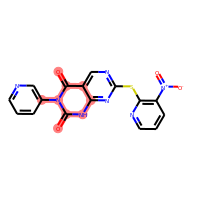
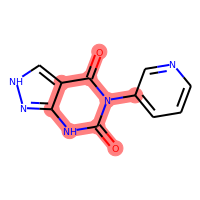

In [53]:
scaff = 'Scaffold_12'
params = rdFMCS.MCSParameters()
params.BondCompareParameters.CompleteRingsOnly=True
params.Threshold=0.8
mcs = rdFMCS.FindMCS(list(synscreen[synscreen.scaffold==scaff].ROMol),params)
print(mcs.smartsString)
tmp = synscreen[synscreen.scaffold==scaff]
tmp[tmp.ROMol>=Chem.MolFromSmarts(mcs.smartsString)]

In [ ]:
mcs.

In [99]:
from collections import defaultdict
params = rdFMCS.MCSParameters()
params.BondCompareParameters.CompleteRingsOnly=True
params.Threshold=0.8
scaffs = defaultdict(list)
for scaff in synscreen.scaffold.unique():
    subset = synscreen[synscreen.scaffold==scaff]
    subset['ROMol'] = [Chem.Mol(x) for x in list(subset.ROMol)]
#     if len(subset)>100:
#         continue
    print(f'Doing {scaff} with {len(subset)} mols')
    mcs = rdFMCS.FindMCS(list(subset.ROMol),params)
    print(mcs.smartsString)
    matches = subset[subset.ROMol>=Chem.MolFromSmarts(mcs.smartsString)]
    mol = matches.iloc[0].ROMol
    scaffs['scaffold'].append(scaff)
    scaffs['ROMol'].append(mol)
    scaffs['smarts'].append(mcs.smartsString)
    scaffs['timed_out'].append(mcs.canceled)
scaffs = pd.DataFrame(scaffs)


/other_linux/home/glandrum/anaconda3/envs/rdkit_blog/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Doing Scaffold_05 with 265 mols
[#6]-&!@[#7]-&!@[#6]1:&@[#6]:&@[#6]:&@[#7]:&@[#6](:&@[#7]:&@1)-&!@[#7]-&!@[#6]
Doing Scaffold_10 with 502 mols
[#6]12:&@[#6]:&@[#6]:&@[#7]:&@[#7]:&@1:&@[#6](:&@[#6]:&@[#6](:&@[#7]:&@2)-&!@[#6])=&!@[#8]
Doing Scaffold_09 with 344 mols
[#6]-&!@[#6]1=&@[#7]-&@[#7](-&@[#6](-&@[#6]-&@1)-&!@[#6])-&!@[#6]
Doing Scaffold_16 with 269 mols
[#6]-&!@[#8]-&!@[#6](=&!@[#8])-&!@[#6]1(-&!@[#6])-&@[#7]-&@[#6](-&@[#6]2-&@[#6]-&@1-&@[#6](-&@[#7]-&@[#6]-&@2=&!@[#8])=&!@[#8])-&!@[#6]
Doing Scaffold_07 with 76 mols
[#6]-&!@[#6]1=&@[#7]-&@[#7]-&@[#6](-&@[#6]-&@1)=&!@[#8]
Doing Scaffold_02 with 106 mols
[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#6]1:&@[#6](:&@[#16]:&@[#6](:&@[#7]:&@1)-&!@[#7])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1
Doing Scaffold_06 with 273 mols
[#6]-&!@[#6](-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#8])-&!@[#7]-&!@[#6]
Doing Scaffold_01 with 204 mols
[#6]-&!@[#6]-&!@[#7]1:&@[#6]:&@[#7]:&@[#6]:&@[#6]:&@1-&!@[#6]
Doing Scaffold_13 w

In [100]:
counts = [len(synscreen[synscreen.scaffold == scaff]) for scaff in synscreen.scaffold.unique()]
#scaffs['count'] = [x for x in counts if x<=100]
scaffs['count'] = counts

,scaffold,ROMol,smarts,timed_out,count
0,Scaffold_05,,[#6]-&!@[#7]-&!@[#6]1:&@[#6]:&@[#6]:&@[#7]:&@[...,False,265
1,Scaffold_10,,[#6]12:&@[#6]:&@[#6]:&@[#7]:&@[#7]:&@1:&@[#6](...,False,502
2,Scaffold_09,,[#6]-&!@[#6]1=&@[#7]-&@[#7](-&@[#6](-&@[#6]-&@...,False,344
3,Scaffold_16,,[#6]-&!@[#8]-&!@[#6](=&!@[#8])-&!@[#6]1(-&!@[#...,False,269
4,Scaffold_07,,[#6]-&!@[#6]1=&@[#7]-&@[#7]-&@[#6](-&@[#6]-&@1...,False,76
5,Scaffold_02,,[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)...,False,106
6,Scaffold_06,,[#6]-&!@[#6](-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@...,False,273
7,Scaffold_01,,[#6]-&!@[#6]-&!@[#7]1:&@[#6]:&@[#7]:&@[#6]:&@[...,False,204
8,Scaffold_13,,[#6]-&!@[#7]-&!@[#6](=&!@[#8])-&!@[#6]1:&@[#6]...,False,17
9,Scaffold_19,,[#6]-&!@[#6]-&!@[#7]-&!@[#6]1:&@[#7]:&@[#6]2:&...,False,256

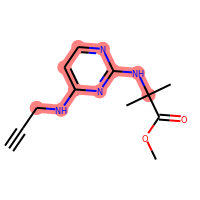
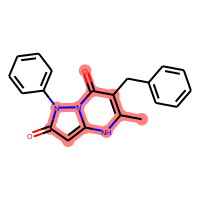
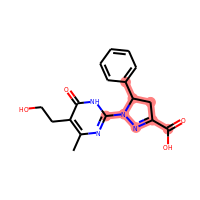
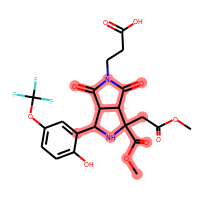
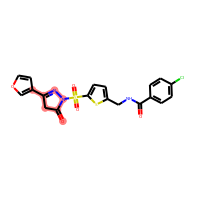
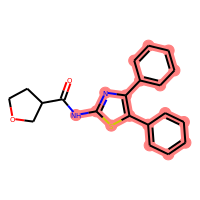
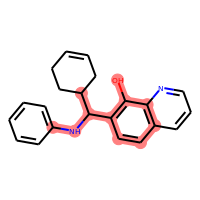
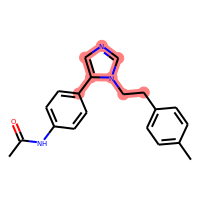
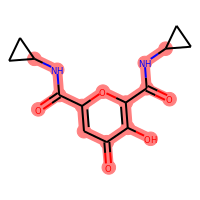
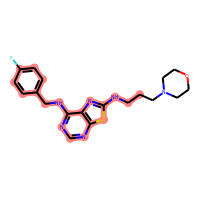
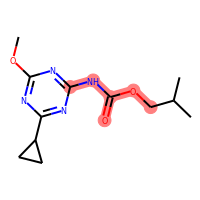
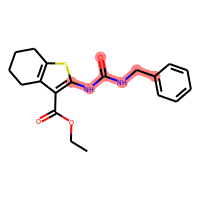
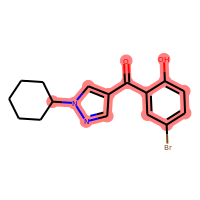
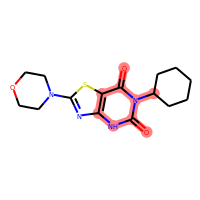
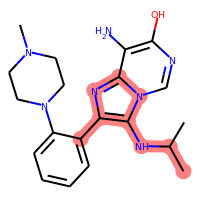
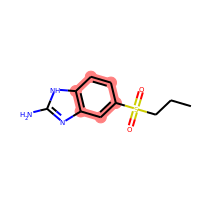
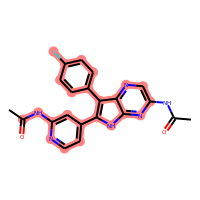
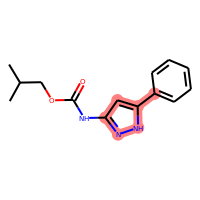

In [101]:
scaffs

## The measured data

Finally, let's look at the measured data that's present.

Every compound has measured % inhibition values and an assignment to "active", "inactive", and "gray" bins in the cdk_act_bin_1 column (the assignment scheme for this is in that PDF).

In [113]:
df.groupby('cdk_act_bin_1')['mol_name'].count()

cdk_act_bin_1
0      15276
50      1906
100      368
Name: mol_name, dtype: int64

In [118]:
df.groupby(['sourcepool','cdk_act_bin_1'])['mol_name'].count()

sourcepool  cdk_act_bin_1
divscreen   0                11972
            50                1180
            100                207
simscreen   0                  824
            50                  80
            100                 47
synscreen   0                 2480
            50                 646
            100                114
Name: mol_name, dtype: int64

There are also a smaller number of measured IC50 values:

In [139]:
df[df.cdk2_ic50 != 'None'].groupby('sourcepool')['mol_name'].count()

sourcepool
divscreen    51
simscreen    26
synscreen    34
Name: mol_name, dtype: int64

I'll be using this dataset in future blog posts, but I think 